Verifica dell'efficacia della regolarizzazione dei parametri
di un algoritmo di machine learning.

Applicazione della normalizzazione su una regressione logistica
per l'analisi del dataset "Iris"

In [1]:
# importazione librerie necessarie

import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# caricamento dati e costruzione dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# creazione dataset di train e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# normalizzazione dei dati
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [3]:
# implementazione di più regressioni logistiche con
# diversi parametri di regolarizzazione

weights, params, accuracies = [], [], []
c_values = [25, 10, 5, 4, 3, 2, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

for c in c_values:
   lr = LogisticRegression(C=c, random_state=42)  # C = 1 / lambda  ->  lambda = 1 / C
                                                  # (deriva da uno standard utilizzato nelle SVM)
   lr.fit(X_train_std, y_train)
   predictions = lr.predict(X_test_std)

   # log dell'addestramento
   weights.append(lr.coef_[1])
   params.append(c)
   accuracies.append(accuracy_score(y_test, predictions))

df_weights = pd.DataFrame(weights, columns=['Sepal Length Weight', 'Sepal Width Weight','Petal Length Weight', 'Petal Width Weight'])
weights = np.array(weights)

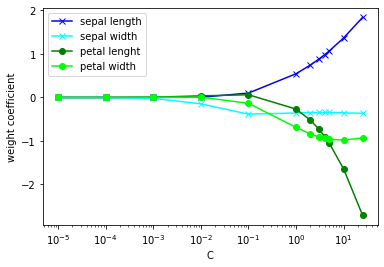

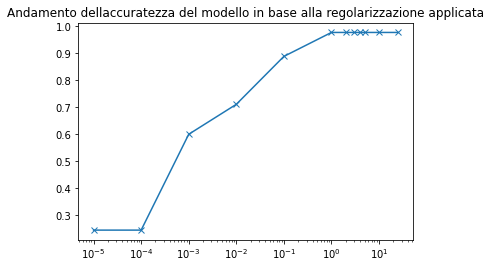

In [4]:
# Grafici dei risultati ottenuti

plt.xscale('log')
plt.plot(params, weights[:, 0], color='blue', marker='x', label='sepal length')
plt.plot(params, weights[:, 1], color='cyan', marker='x', label='sepal width')
plt.plot(params, weights[:, 2], color='green',  marker='o', label='petal lenght')
plt.plot(params, weights[:, 3], color='lime',  marker='o', label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='best')
# plt.xscale('log')
plt.show()

plt.title('Andamento dell''accuratezza del modello in base alla regolarizzazione applicata')
plt.xscale('log')
plt.plot(params, accuracies, marker='x')
plt.show()

In [5]:
# visualizzazione dei pesi ottimizzati per i diversi valori
# di regolarizzazione utilizzati

# sfruttiamo Pandas per formattare automaticamente
# i dati da visualizzare
df_weights

,Sepal Length Weight,Sepal Width Weight,Petal Length Weight,Petal Width Weight
0,1.838870,-0.363860,-2.703717,-0.931094
1,1.368148,-0.352788,-1.642738,-0.977751
2,1.068698,-0.345492,-1.050962,-0.960584
3,0.982707,-0.344373,-0.897282,-0.940993
4,0.878787,-0.344109,-0.723169,-0.906055
5,0.744742,-0.346345,-0.519984,-0.838966
6,0.544570,-0.357462,-0.266792,-0.686632
7,0.101138,-0.382225,0.062197,-0.134264
8,0.004112,-0.146665,0.037107,0.006927
9,0.000875,-0.020253,0.006144,0.002859
